# Carga de librerías:

In [1]:
from sklearn import datasets
import pandas as pd
pd.options.display.max_columns = 500
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

# Lectura de datos:


In [2]:
#Acceso y exploración de los datos
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
print(u'- El número de filas en el dataset es: {}'.format(train_df.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(train_df.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(train_df.columns)))


- El número de filas en el dataset es: 891
- El número de columnas en el dataset es: 12
- Los nombres de las variables son: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Descripción del dataset:

Cuenta con un total de **11 variables predictoras X** y una **variable a predecir Y**.

El número total de muestras es de 891 personas.

In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Análisis y tratamiento de problemas de datos 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include = 'object') 


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Observamos que: 
- La variable 'parch' (número de padres/hijos) y la variable 'sibsp' (número de hermanos) nos puede ser útil para crear una nueva feature que sume las familias a bordo. 

- La variable 'passanger_id' podríamos eliminarla porque no creo que aporte ningún tipo de información.

- La variable 'age' podemos dividirla en rangos de forma que obtengamos una variable categórica para mejorar el análisis. 

- El nº de ticket tiene muchos valores duplicados ya que solo son 681 valores unicos de 681 datos, es decir, sobre el 22% de datos duplicados. Además, no creo que este muy correlacionado con sobrevivir o no, por tanto lo eliminaré de mi dataset.

- La variable cabina le faltan muchos valores, por tanto también la eliminaré de mi dataset. 

- La variable 'name' no creo que esté relacionada directamente con la supervivencia. Pero podemos establecer una nueva feature a partir de la variable 'name' que sea más significativa.

## Relación de nuestras variables con la target

### Las variables categóricas: 

In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

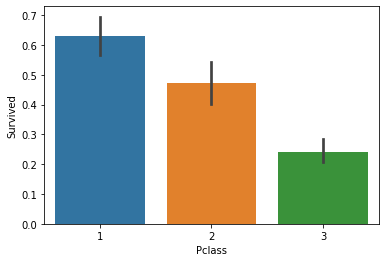

In [8]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

Vemos que la 'Pclass' está relacionada con las probabilidades de sobrevivir, sobre todo la clase 1.

In [9]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

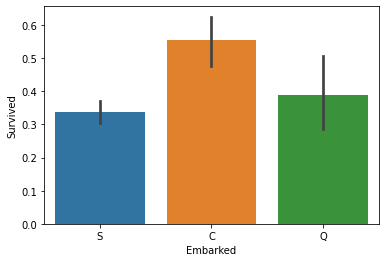

In [10]:
sns.barplot(x='Embarked',y='Survived',data=train_df)

Se percibe que en la puerta de embarque C hubo más probabilidades de supervivencia. 

In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

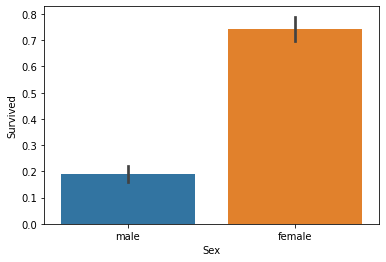

In [12]:
sns.barplot(x='Sex',y='Survived',data=train_df)

Claramente las mujeres tuvieron más probabilidades de sobrevivir que los hombres. 

In [13]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

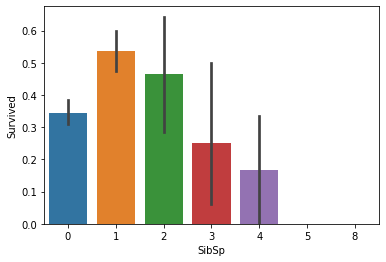

In [14]:
sns.barplot(x='SibSp',y='Survived',data=train_df)

In [15]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

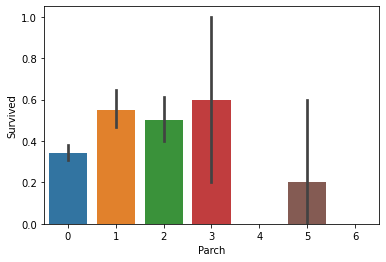

In [16]:
sns.barplot(x='Parch',y='Survived',data=train_df)

### Las variables numéricas:

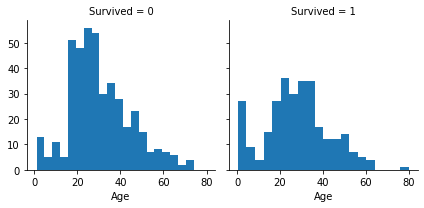

In [17]:
age_graf= sns.FacetGrid(train_df, col='Survived')
age_graf.map(plt.hist, 'Age', bins=20)

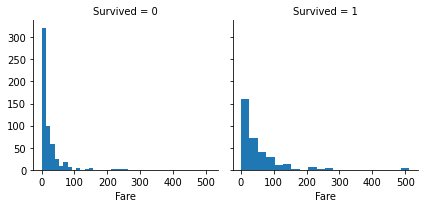

In [18]:
fare_graf= sns.FacetGrid(train_df, col='Survived')
fare_graf.map(plt.hist, 'Fare', bins=20)

## Missings

In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [22]:
train_df=train_df.drop(['Ticket', 'Cabin'], axis= 1)
test_df=test_df.drop(['Ticket', 'Cabin'], axis= 1)

Tenemos que añadir valores a la variable 'Age' y a 'Embarked' en el train_df.

Tenemos que añadir valores a la variable 'Age' y a 'Fare' en el test_df.

In [23]:
#compute mean and standard dev of Age
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()

#number of NaN values (non number values)
num_na = train_df['Age'].isna().sum()

#generate random ages from mean and standard dev
random_vals = age_mean + age_std * np.random.randn(num_na)

#replace missing values with random_vals
train_df.loc[train_df['Age'].isna(), 'Age']= random_vals

train_df['Age']= train_df['Age'].astype(np.int64)

In [24]:
#compute mean and standard dev of Age
age_mean = test_df['Age'].mean()
age_std = test_df['Age'].std()

#number of NaN values (non number values)
num_na = test_df['Age'].isna().sum()

#generate random ages from mean and standard dev
random_vals = age_mean + age_std * np.random.randn(num_na)

#replace missing values with random_vals
test_df.loc[test_df['Age'].isna(), 'Age'] = random_vals

# convert to whole numbers
test_df['Age'] = test_df['Age'].astype(np.int64)

#view data to check work
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-13,1,2,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,7.75,Q


In [25]:
moda= train_df.Embarked.dropna().mode()[0]
moda

'S'

In [26]:
#Rellenamos los datos faltantes de embarked con la moda
train_df['Embarked']= train_df['Embarked'].fillna(moda)


In [27]:
mediana= test_df.Fare.median()
mediana

14.4542

In [28]:
test_df['Fare']= test_df['Fare'].fillna(mediana)
test_df['Fare']=test_df['Fare'].astype(int)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Fare         418 non-null    int32 
 8   Embarked     418 non-null    object
dtypes: int32(1), int64(5), object(3)
memory usage: 27.9+ KB


## Creación de nuevas features

In [30]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Cargo')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss') 
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Cargo,0.347826
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651


In [33]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Cargo')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss') 
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
  

In [34]:
#Ahora podemos eliminar nuestra variable 'name'
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [35]:
#Creamos los rangos para las edades: menores de edad, adultos, tercera edad
test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 60), 'Age'] = 1
test_df.loc[ test_df['Age'] > 60, 'Age'] = 2

train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 60), 'Age'] = 1
train_df.loc[ train_df['Age'] > 60, 'Age'] = 2


In [36]:
train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0,0.496454
1,1,0.368785
2,2,0.192308


In [37]:
train_df['Nfamilia'] = train_df['SibSp'] + train_df['Parch'] 
test_df['Nfamilia'] = test_df['SibSp'] + test_df['Parch'] 


train_df[['Nfamilia', 'Survived']].groupby(['Nfamilia'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Nfamilia,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [38]:
#dividimos según si la persona estaba sola, en familia pequeña o familia numerosa
test_df.loc[ test_df['Nfamilia'] == 0, 'Nfamilia'] = 0
test_df.loc[(test_df['Nfamilia'] > 0) & (test_df['Nfamilia'] <= 3), 'Age'] = 1
test_df.loc[ test_df['Nfamilia'] > 3, 'Nfamilia']= 2

In [39]:
#dividimos según si la persona estaba sola, en familia pequeña o familia numerosa
train_df.loc[ train_df['Nfamilia'] == 0, 'Nfamilia'] = 0
train_df.loc[(train_df['Nfamilia'] > 0) & (train_df['Nfamilia'] <= 3), 'Nfamilia'] = 1
train_df.loc[ train_df['Nfamilia'] > 3, 'Nfamilia']= 2

In [40]:
train_df[['Nfamilia', 'Survived']].groupby(['Nfamilia'], as_index=False).mean().sort_values(by='Nfamilia', ascending=True)

,Nfamilia,Survived
0,0,0.303538
1,1,0.578767
2,2,0.161290


<AxesSubplot:xlabel='Nfamilia', ylabel='Survived'>

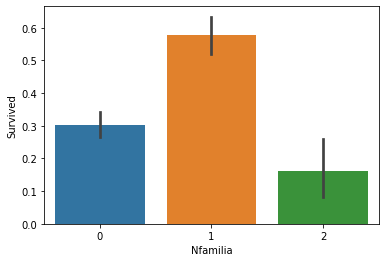

In [41]:
sns.barplot(x='Nfamilia',y='Survived',data=train_df)

Tal como se muestra en la gráfica y en los valores de la tabla anterior, hay más probabilidades de supervivencia en familias de entre 1 a 3 familiares.

In [42]:
#Eliminamos estas variables porque ya no nos hacen falta. 
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

In [43]:
#Creamos rangos para los precios
train_df['FareBand'] = pd.qcut(train_df['Fare'], 3)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [44]:
train_df.loc[ train_df['Fare'] <= 8.662, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 26), 'Fare'] = 1
train_df.loc[ train_df['Fare'] > 26, 'Fare'] = 2
train_df['Fare'] = train_df['Fare'].astype(int)

In [45]:
test_df.loc[ train_df['Fare'] <= 8.662, 'Fare'] = 0
test_df.loc[(train_df['Fare'] > 8.662) & (test_df['Fare'] <= 26), 'Fare'] = 1
test_df.loc[ train_df['Fare'] > 26, 'Fare'] = 2
test_df['Fare'] = test_df['Fare'].astype(int)

In [46]:
train_df= train_df.drop(['FareBand'], axis=1)


In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Nfamilia
0,0,3,male,1,0,S,Mr,1
1,1,1,female,1,2,C,Mrs,1
2,1,3,female,1,0,S,Miss,0
3,1,1,female,1,2,S,Mrs,1
4,0,3,male,1,0,S,Mr,0


## Categóricas a numericas

In [48]:
# Lista de variables categóricas
train_df.select_dtypes(exclude=['number']).columns

Index(['Sex', 'Embarked', 'Title'], dtype='object')

In [49]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [50]:
dic = {'male':0, 'female':1}
train_df["Sex"].replace(dic, inplace=True)
test_df["Sex"].replace(dic, inplace=True)

In [51]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
dicc = {'S':0, 'C':1, 'Q':2}
train_df['Embarked'].replace(dicc, inplace=True)
test_df['Embarked'].replace(dicc, inplace=True)

In [53]:
di = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Cargo": 5}
train_df["Title"].replace(di, inplace=True)
test_df["Title"].replace(di, inplace=True)


In [88]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Nfamilia
0,0,3,0,1,0,0,1,1
1,1,1,1,1,2,1,3,1
2,1,3,1,1,0,0,2,0
3,1,1,1,1,2,0,3,1
4,0,3,0,1,0,0,1,0


In [55]:
test_df=test_df.drop(['PassengerId'], axis=1)
test_df.head()


,Pclass,Sex,Age,Fare,Embarked,Title,Nfamilia
0,3,0,1,0,2,1,0
1,3,1,1,0,0,3,1
2,2,0,2,0,2,1,0
3,3,0,1,0,0,1,0
4,3,1,1,0,0,3,2


## Division en features X + target Y 

In [56]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.copy()

# Visualizaciones y correlaciones

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   Fare      418 non-null    int32
 4   Embarked  418 non-null    int64
 5   Title     418 non-null    int64
 6   Nfamilia  418 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 21.4 KB


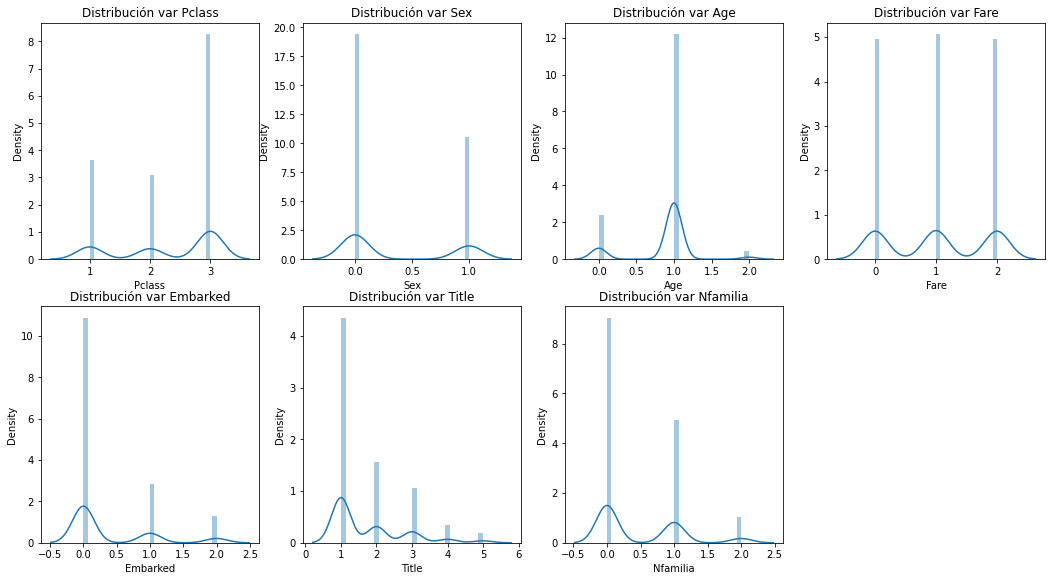

In [58]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X_train.columns):
    n+=1
    plt.subplot(4, 4, n)
    sns.distplot(X_train[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

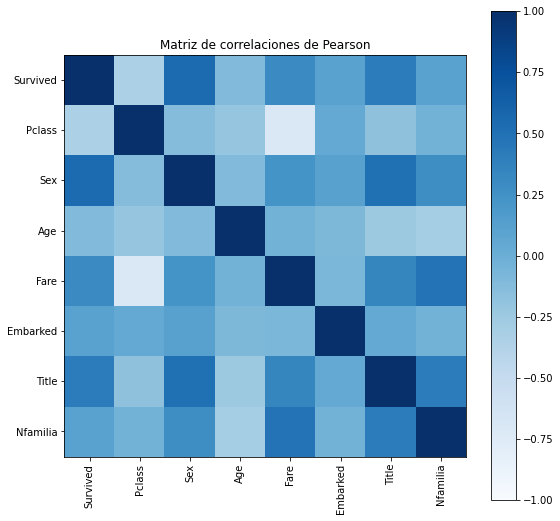

In [59]:
matriz_correlaciones = train_df.corr(method='pearson')
n_ticks = len(train_df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), train_df.columns, rotation='vertical')
plt.yticks(range(n_ticks), train_df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

Vemos que nuestras variables no están muy correlaciondas.

## Modelo de redes neuronales

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [61]:
#estandarización
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X_train)
X_train_estand= X_estandarizado

In [62]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 3), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [63]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs.fit(X_train_estand, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.1 , 0.01]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [64]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'alpha': 0.1, 'hidden_layer_sizes': 30, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.83


In [65]:
#obtenemos los mejores parametros y ajustamos con esos.
mejor_modelo = MLPClassifier(**modelo_gs.best_params_, verbose=10)

In [66]:
mejor_modelo.fit(X_train_estand, Y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0,
              solver='lbfgs', verbose=10)

In [67]:
mejor_modelo.predict(X_test[:]).sum()


98

Según las predicciones sobrevivieron 98 personas de 418.

In [68]:
acc_net= round(modelo_gs.best_score_* 100,2)
acc_net

82.73

## Modelo de Regresión Logística

In [69]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


80.58

In [70]:
Y_pred.sum()

127

Según las predicciones sobrevivieron 127 personas de 418.

## Support Vector Machines


In [71]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.39

In [72]:
Y_pred.sum()

122

Según las predicciones sobrevivieron 122 personas de 418.

## KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [74]:
Y_pred.sum()

122

Según las predicciones sobrevivieron 122 personas de 418.

## Gaussian Naive Bayes


In [75]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

In [76]:
Y_pred.sum()

134

Según las predicciones sobrevivieron 134 personas de 418.

## Decision Tree


In [77]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

In [78]:
Y_pred.sum()

156

Según las predicciones sobrevivieron 156 personas de 418.

## Random Forest


In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


85.75

In [80]:
Y_pred.sum()

132

Según las predicciones sobrevivieron 132 personas de 418.

# Evaluación

In [81]:
models = pd.DataFrame({
    'Model': ['Red Neuronal','Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_net, acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,85.75
6,Decision Tree,85.75
2,KNN,83.95
1,Support Vector Machines,83.39
0,Red Neuronal,82.73
3,Logistic Regression,80.58
5,Naive Bayes,78.00


Entonces el mejor modelo sería Random Forest.

In [89]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82222222 0.82022472 0.74157303 0.84269663 0.86516854 0.83146067
 0.83146067 0.7752809  0.84269663 0.83146067]
Mean: 0.8204244694132334
Standard Deviation: 0.034085607125442494


Al aplicar Cross-Validation nuestro modelo tiene una precisión promedio del 82 % con una desviación estándar del 3.4%. La desviación estándar nos muestra qué tan precisas son las estimaciones.


Podemos mejorar estos valores analizando la importancia de cada variable en nuestro modelo. Si hay alguna que no sea significativa la podríamos eliminar. 

In [91]:
importancia = pd.DataFrame({'feature':X_train.columns,'importancia':np.round(random_forest.feature_importances_,3)})
importancia = importancia.sort_values('importancia',ascending=False).set_index('feature')
importancia.head(15)

,importancia
feature,
Title,0.281
Sex,0.254
Pclass,0.154
Nfamilia,0.111
Fare,0.094
Age,0.055
Embarked,0.052


Vemos que nuestras variables son bastantes significativas, por tanto, continuamos con el modelo tal y como está.

## Predicciones sobre Random Forest

In [82]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[474,  75],
       [ 99, 243]], dtype=int64)

La primera fila trata sobre las predicciones de los que no sobrevivieron: 474 pasajeros se clasificaron correctamente como no sobrevivientes y 75 se clasificaron incorrectamente como no sobrevivientes (falsos positivos).
La segunda fila es sobre las predicciones de los que sobrevivieron: 99 pasajeros se clasificaron incorrectamente como sobrevivientes (falsos negativos) y 243 se clasificaron correctamente como sobrevivientes.

In [83]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7641509433962265
Recall: 0.7105263157894737


La precisión nos informa sobre el porcentaje de veces de verdaderos positivos (supervivencia de un pasajero correctamente).

El recall nos dice que predijo la supervivencia del  71% de las personas que realmente sobrevivieron.

In [84]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7363636363636363

Combinando la precisión y recall se obtiene la puntuación F. 

### AUC ROC

Otra forma de evaluar el modelo de clasificación binaria es La curva ROC AUC. Esta curva traza la tasa de verdaderos positivos frente a la tasa de falsos positivos. 

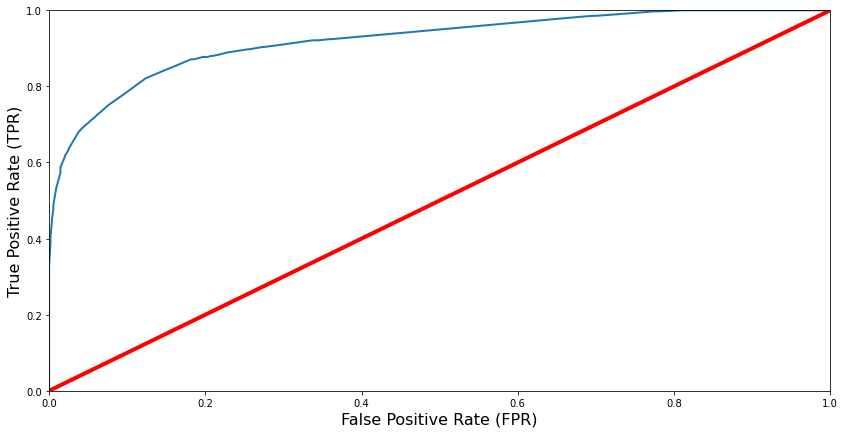

In [85]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Un clasificador que es 100% correcto, tendría una puntuación ROC AUC de 1 y un clasificador completamente aleatorio tendría una puntuación de 0,5.

In [86]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9205067160919908




Vemos que en nuestro caso tenemos un clasificador bastante bueno.